# VAC Python Demo
## _How to use notebook for Python Only_
### header 3
#### etc..
RMardown syntax: https://www.datacamp.com/tutorial/markdown-in-jupyter-notebook

How to install JupyterNotebook without Anaconda: https://www.studytonight.com/post/how-to-install-jupyter-notebook-without-anaconda-on-windows

data source: https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

In [1]:
# !pip install numpy
# import random
# from sklearn import preprocessing
import numpy as np
import pandas as pd


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

C:\Users\cathe\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
SeoulBikeDatas = pd.read_csv('SeoulBikeData.csv', encoding= 'unicode_escape')
SeoulBikeDatas

,Date,Rented.Bike.Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [3]:
SeoulBikeDatas.pivot_table('Rented.Bike.Count',
                              index = 'Functioning Day',
                              aggfunc = 'sum')

,Rented.Bike.Count
Functioning Day,
No,0
Yes,6172314


In [4]:
# keeping only the data on functional days:
SeoulBikeDataTidy = SeoulBikeDatas.loc[SeoulBikeDatas['Functioning Day']=='Yes']

In [5]:
SeoulBikeDataTidy.pivot_table('Rented.Bike.Count',
                              index = 'Functioning Day',
                              aggfunc = 'sum')

,Rented.Bike.Count
Functioning Day,
Yes,6172314


In [6]:
# getting a summary of the data:
SeoulBikeDataTidy.drop(["Date", "Seasons", "Holiday", "Functioning Day"], axis=1).describe(include= 'all').round(1)

,Rented.Bike.Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8465.0,8465.0,8465.0,8465.0,8465.0,8465.0,8465.0,8465.0,8465.0,8465.0
mean,729.2,11.5,12.8,58.1,1.7,1433.9,3.9,0.6,0.1,0.1
std,642.4,6.9,12.1,20.5,1.0,609.1,13.2,0.9,1.1,0.4
min,2.0,0.0,-17.8,0.0,0.0,27.0,-30.6,0.0,0.0,0.0
25%,214.0,6.0,3.0,42.0,0.9,935.0,-5.1,0.0,0.0,0.0
50%,542.0,12.0,13.5,57.0,1.5,1690.0,4.7,0.0,0.0,0.0
75%,1084.0,18.0,22.7,74.0,2.3,2000.0,15.2,0.9,0.0,0.0
max,3556.0,23.0,39.4,98.0,7.4,2000.0,27.2,3.5,35.0,8.8


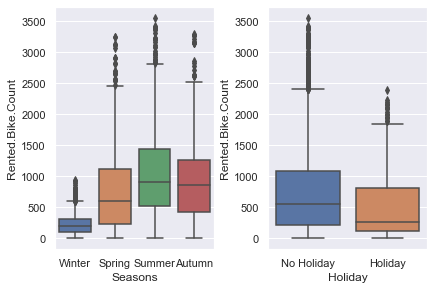

In [7]:
fig, ax =plt.subplots(1,2)

sns.boxplot(x="Seasons", y="Rented.Bike.Count",
                 data=SeoulBikeDataTidy, ax=ax[0])
sns.boxplot(x="Holiday", y="Rented.Bike.Count",
                 data=SeoulBikeDataTidy , ax=ax[1])
fig.tight_layout(pad=0.5)

In [8]:
sns.set_style("whitegrid")
sns.set_palette("Spectral")

## _How to use R in a Python Kernel Method 1_

In [9]:
# pip install rpy2  ## run in anaconda powershell prompt and need to have r installed
import rpy2
import rpy2.robjects as robjects
import rpy2.robjects.packages as rpackages
import rpy2.robjects.lib.ggplot2 as ggplot2
# rpy2 rules: https://rpy2.github.io/doc/latest/html/introduction.html

Unable to determine R home: [WinError 2] The system cannot find the file specified
C:\Users\cathe\anaconda3\lib\site-packages\rpy2\robjects\lib\ggplot2.py:70: UserWarning: This was designed againt ggplot2 versions starting with 3.3. but you have 3.4.4
  warnings.warn(


In [10]:
utils = rpackages.importr('utils')
utils.chooseCRANmirror(ind=1) # select the first mirror in the list
base = rpackages.importr("base")
r = robjects.r

In [11]:
pi = r['pi']
print(pi)

[1] 3.141593



In [12]:
# utils.install_packages('ggplot2')
tidyverse = rpackages.importr('tidyverse')
readr = rpackages.importr('readr')

In [13]:
r_data_in_py = readr.read_csv("C:/Users/cathe/OneDrive/Documents/Python Scripts/VACdemo/SeoulBikeData.csv", show_col_types = False, locale = readr.locale(encoding = "latin1"))
r_data_in_py

Date,Rented.Bike.Count,Hour,...,Seasons,Holiday,Functioning Day
'01/12/20...,254.000000,0.000000,...,'Winter','No Holid...,'Yes'
'01/12/20...,204.000000,1.000000,,'Winter','No Holid...,'Yes'
'01/12/20...,173.000000,2.000000,,'Winter','No Holid...,'Yes'
'01/12/20...,107.000000,3.000000,,'Winter','No Holid...,'Yes'
...,...,...,,...,...,...
'30/11/20...,764.000000,20.000000,,'Autumn','No Holid...,'Yes'
'30/11/20...,694.000000,21.000000,,'Autumn','No Holid...,'Yes'
'30/11/20...,712.000000,22.000000,,'Autumn','No Holid...,'Yes'
'30/11/20...,584.000000,23.000000,,'Autumn','No Holid...,'Yes'


In [14]:
p = (ggplot2.ggplot(r_data_in_py) + 
      ggplot2.aes_string(x = 'Seasons', y = 'Rented.Bike.Count') +
      ggplot2.geom_boxplot() +
      ggplot2.theme_bw()+
      ggplot2.scale_fill_brewer(palette="BuPu"))
p.plot()

## _How to use a Python output as input in R_

In [15]:
# How to convert a python data frame to an R one: https://stackoverflow.com/questions/20630121/how-to-convert-r-dataframe-back-to-pandas-using-rpy2
from rpy2.robjects import pandas2ri
pandas2ri.activate()

In [16]:
SeoulBikeDataTidy_r = robjects.conversion.py2rpy(SeoulBikeDataTidy)
SeoulBikeDataTidy_r

C:\Users\cathe\anaconda3\lib\site-packages\rpy2\robjects\pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


Date,Rented.Bike.Count,Hour,...,Seasons,Holiday,Functioning Day
'01/12/20...,...,...,...,'Winter','No Holid...,'Yes'
'01/12/20...,,,,'Winter','No Holid...,'Yes'
'01/12/20...,,,,'Winter','No Holid...,'Yes'
'01/12/20...,,,,'Winter','No Holid...,'Yes'
...,,,,...,...,...
'30/11/20...,,,,'Autumn','No Holid...,'Yes'
'30/11/20...,,,,'Autumn','No Holid...,'Yes'
'30/11/20...,,,,'Autumn','No Holid...,'Yes'
'30/11/20...,,,,'Autumn','No Holid...,'Yes'


In [17]:
r.str(SeoulBikeDataTidy_r)

'data.frame':	8465 obs. of  14 variables:
 $ Date                      : chr  "01/12/2017" "01/12/2017" "01/12/2017" "01/12/2017" ...
 $ Rented.Bike.Count         : int  254 204 173 107 78 100 181 460 930 490 ...
 $ Hour                      : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Temperature(°C)          : num  -5.2 -5.5 -6 -6.2 -6 -6.4 -6.6 -7.4 -7.6 -6.5 ...
 $ Humidity(%)               : int  37 38 39 40 36 37 35 38 37 27 ...
 $ Wind speed (m/s)          : num  2.2 0.8 1 0.9 2.3 1.5 1.3 0.9 1.1 0.5 ...
 $ Visibility (10m)          : int  2000 2000 2000 2000 2000 2000 2000 2000 2000 1928 ...
 $ Dew point temperature(°C): num  -17.6 -17.6 -17.7 -17.6 -18.6 -18.7 -19.5 -19.3 -19.8 -22.4 ...
 $ Solar Radiation (MJ/m2)   : num  0 0 0 0 0 0 0 0 0.01 0.23 ...
 $ Rainfall(mm)              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Snowfall (cm)             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Seasons                   : chr  "Winter" "Winter" "Winter" "Winter" ...
 $ Holiday                   : chr  "No Hol

<rpy2.rinterface_lib.sexp.NULLType object at 0x000001BE1F6AF380> [RTYPES.NILSXP]

In [18]:
p2 = (ggplot2.ggplot(SeoulBikeDataTidy_r) + 
      ggplot2.aes_string(x = 'Seasons', y = 'Rented.Bike.Count') +
      ggplot2.geom_boxplot() +
      ggplot2.theme_bw()+
      ggplot2.scale_fill_brewer(palette="BuPu"))
p2.plot()

## _How to use an R output as input in Python_

In [19]:
r_output = robjects.conversion.rpy2py(r_data_in_py)
r_output

,Date,Rented.Bike.Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
1,01/12/2017,254.0,0.0,-5.2,37.0,2.2,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,204.0,1.0,-5.5,38.0,0.8,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,173.0,2.0,-6.0,39.0,1.0,2000.0,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,107.0,3.0,-6.2,40.0,0.9,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,78.0,4.0,-6.0,36.0,2.3,2000.0,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,30/11/2018,1003.0,19.0,4.2,34.0,2.6,1894.0,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,764.0,20.0,3.4,37.0,2.3,2000.0,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,694.0,21.0,2.6,39.0,0.3,1968.0,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,712.0,22.0,2.1,41.0,1.0,1859.0,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


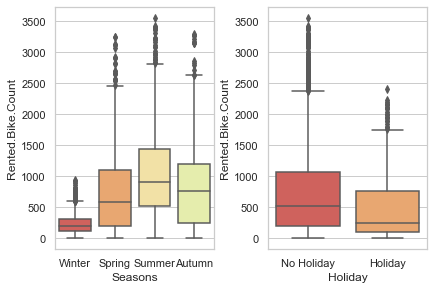

In [20]:
fig, ax =plt.subplots(1,2)

sns.boxplot(x="Seasons", y="Rented.Bike.Count",
                 data=r_output, ax=ax[0])
sns.boxplot(x="Holiday", y="Rented.Bike.Count",
                 data= r_output , ax=ax[1])
fig.tight_layout(pad=0.5)

## _How to use R in a Python Kernel method 2_

magic commands: https://www.python4data.science/en/v1.0.0/workspace/ipython/magics.html

languages supported in mythod: https://jupyter4edu.github.io/jupyter-edu-book/jupyter.html

how to use the R magic command: https://rpy2.github.io/doc/v3.3.x/html/notebooks.html

rmagic keywords: https://ipython.org/ipython-doc/2/config/extensions/rmagic.html

In [21]:
 # %R for a single line ot %%R for a cell, but the latter needs to start at the beginning of a cell
%load_ext rpy2.ipython


C:\Users\cathe\anaconda3\lib\site-packages\rpy2\robjects\packages.py:366: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [22]:
%%R -i SeoulBikeDataTidy
glimpse(SeoulBikeDataTidy)

C:\Users\cathe\anaconda3\lib\site-packages\rpy2\robjects\pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


Rows: 8,465
Columns: 14
$ Date                         <chr> "01/12/2017", "01/12/2017", "01/12/2017",~
$ Rented.Bike.Count            <int> 254, 204, 173, 107, 78, 100, 181, 460, 93~
$ Hour                         <int> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,~
$ `Temperature(°C)`           <dbl> -5.2, -5.5, -6.0, -6.2, -6.0, -6.4, -6.6,~
$ `Humidity(%)`                <int> 37, 38, 39, 40, 36, 37, 35, 38, 37, 27, 2~
$ `Wind speed (m/s)`           <dbl> 2.2, 0.8, 1.0, 0.9, 2.3, 1.5, 1.3, 0.9, 1~
$ `Visibility (10m)`           <int> 2000, 2000, 2000, 2000, 2000, 2000, 2000,~
$ `Dew point temperature(°C)` <dbl> -17.6, -17.6, -17.7, -17.6, -18.6, -18.7,~
$ `Solar Radiation (MJ/m2)`    <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,~
$ `Rainfall(mm)`               <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,~
$ `Snowfall (cm)`              <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,~
$ Seasons                      <chr> "Winter", "Winter", "Winter", "Winter", "~
$ Holiday         

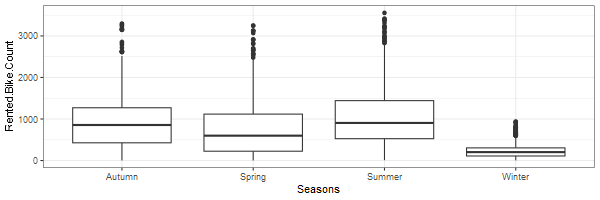

In [23]:
%%R  -w 600 -h 200 --type=cairo

rr = SeoulBikeDataTidy

rrp = ggplot(SeoulBikeDataTidy) +
        aes_string(x = 'Seasons', y = 'Rented.Bike.Count') +
        geom_boxplot() +
        theme_bw()+
        scale_fill_brewer(palette="BuPu")
print(rrp)

In [24]:
list(robjects.globalenv.keys())

['rr', 'rrp', 'SeoulBikeDataTidy']

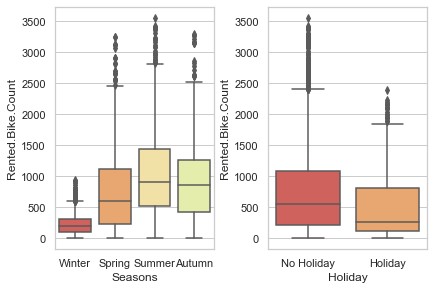

In [25]:
%R -o rr 

fig, ax =plt.subplots(1,2)

sns.boxplot(x="Seasons", y="Rented.Bike.Count",
                 data=rr, ax=ax[0])
sns.boxplot(x="Holiday", y="Rented.Bike.Count",
                 data= rr , ax=ax[1])
fig.tight_layout(pad=0.5)